In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Shri Ganesha\Documents\Excelr_data\CO2 dataset.csv")
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [3]:
data = data.set_index(['Year'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1800 to 2014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [5]:
data.isna().sum()

CO2    0
dtype: int64

In [6]:
data.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


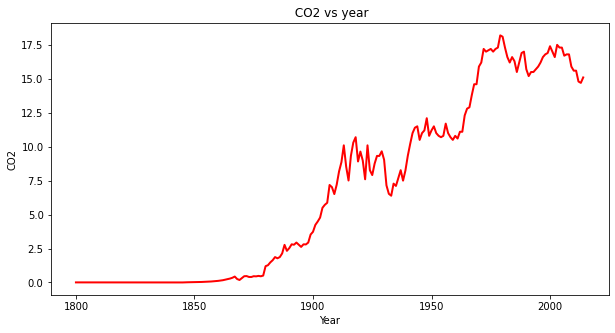

In [7]:
plt.figure(figsize=(10,5))
plt.title(' CO2 vs year')
plt.xlabel("Year")
plt.ylabel("CO2")
plt.plot(data, color = 'red', linewidth=2)
plt.show()

C:\Users\Shri Ganesha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


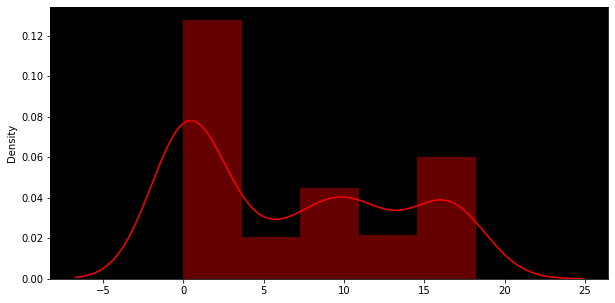

In [8]:
plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_facecolor("black")
sns.distplot(data,color = 'red')
plt.show()

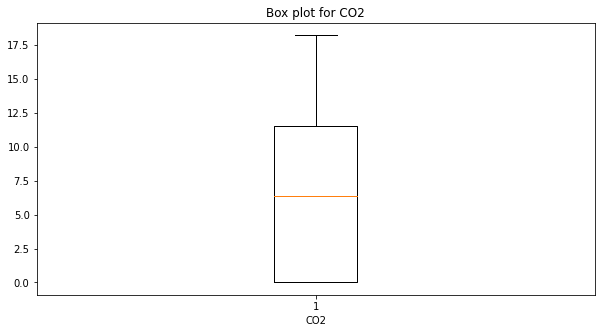

In [9]:

plt.figure(figsize = (10,5))
plt.title('Box plot for CO2')
plt.boxplot(data)
plt.xlabel('CO2')
plt.show()

<Figure size 720x360 with 0 Axes>

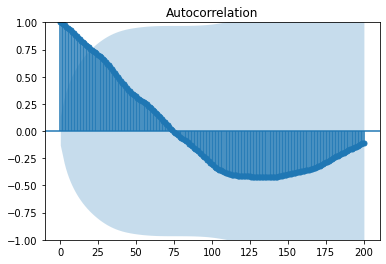

In [10]:
from statsmodels.graphics import tsaplots as tsa_plots

plt.figure(figsize = (10,5))
tsa_plots.plot_acf(data,lags = 200)
plt.show()

C:\Users\Shri Ganesha\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


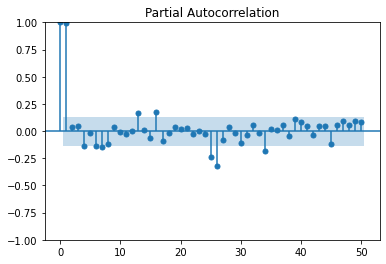

In [11]:
tsa_plots.plot_pacf(data,lags = 50)
plt.show()

# Stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Observations of Dickey-fuller test')
dftest = adfuller(data['CO2'],autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','Lag Used','Number of observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)    

Observations of Dickey-fuller test
Test Statistic                  -0.378463
p-value                          0.913633
Lag Used                         0.000000
Number of observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


### Series is Non stationary

In [13]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [26]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.85)
train, test = X[0:train_size], X[train_size:]

# grid search ARIMA parameters for a time series

In [ ]:


import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), 0
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.485
ARIMA(0, 0, 1) RMSE=5.626
ARIMA(0, 0, 2) RMSE=3.383
ARIMA(0, 1, 0) RMSE=0.551
ARIMA(0, 1, 1) RMSE=0.560
ARIMA(0, 1, 2) RMSE=0.565
ARIMA(0, 2, 0) RMSE=0.716
ARIMA(0, 2, 1) RMSE=0.543
ARIMA(0, 2, 2) RMSE=0.555
ARIMA(1, 0, 0) RMSE=0.558
ARIMA(1, 0, 1) RMSE=0.565
ARIMA(1, 0, 2) RMSE=0.571
ARIMA(1, 1, 0) RMSE=0.557
ARIMA(1, 1, 1) RMSE=0.556
ARIMA(1, 1, 2) RMSE=0.610
ARIMA(1, 2, 0) RMSE=0.647
ARIMA(1, 2, 1) RMSE=0.551
ARIMA(1, 2, 2) RMSE=0.589
ARIMA(2, 0, 0) RMSE=0.564
ARIMA(2, 0, 1) RMSE=0.606
ARIMA(2, 0, 2) RMSE=0.622
ARIMA(2, 1, 0) RMSE=0.566
ARIMA(2, 1, 1) RMSE=0.599
ARIMA(2, 1, 2) RMSE=0.606
ARIMA(2, 2, 0) RMSE=0.617
ARIMA(2, 2, 1) RMSE=0.560
ARIMA(2, 2, 2) RMSE=0.599
Best ARIMA(0, 2, 1) RMSE=0.543


# Holt method

Year
1800     0.050948
1801     0.055767
1802     0.055470
1803     0.054607
1804     0.053704
          ...    
2010    23.206575
2011    23.369126
2012    23.531678
2013    23.694229
2014    23.856781
Length: 215, dtype: float64
2.089165886183223


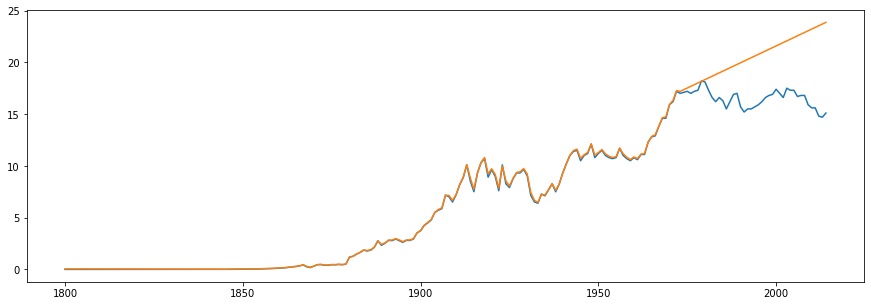

In [32]:

from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing 
hw_model = Holt(train).fit()
pred_hw = hw_model.predict(1,215)
prediction_series = pd.Series(pred_hw,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)
rmse2 = np.sqrt(mean_squared_error(data['CO2'],pred_hw))
print(rmse2)

# Exponential Smoothing

2.089166202409644
Year
1800     0.050948
1801     0.055767
1802     0.055470
1803     0.054607
1804     0.053704
          ...    
2010    23.206576
2011    23.369127
2012    23.531679
2013    23.694230
2014    23.856782
Length: 215, dtype: float64


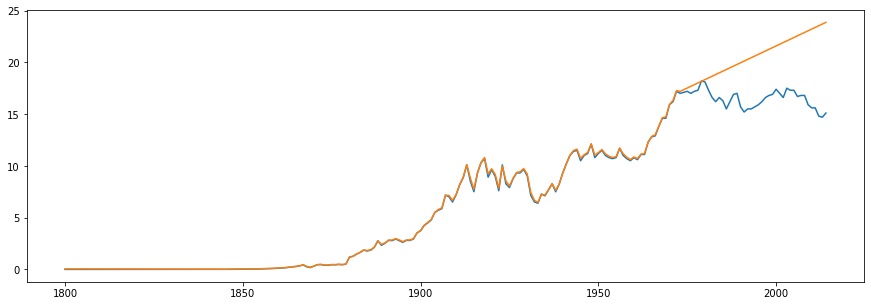

In [33]:
#Exponential Smoothing with Additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_add = ExponentialSmoothing(train,trend = 'add').fit()
prediction = exp_add.predict(1,215)
rmse3 = np.sqrt(mean_squared_error(data['CO2'],prediction))
print(rmse3)
prediction_series = pd.Series(prediction,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)

4.412254126682894
Year
1800     0.005772
1801     0.005725
1802     0.005665
1803     0.005595
1804     0.005533
          ...    
2010    32.067269
2011    32.604830
2012    33.151402
2013    33.707137
2014    34.272188
Length: 215, dtype: float64


C:\Users\Shri Ganesha\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


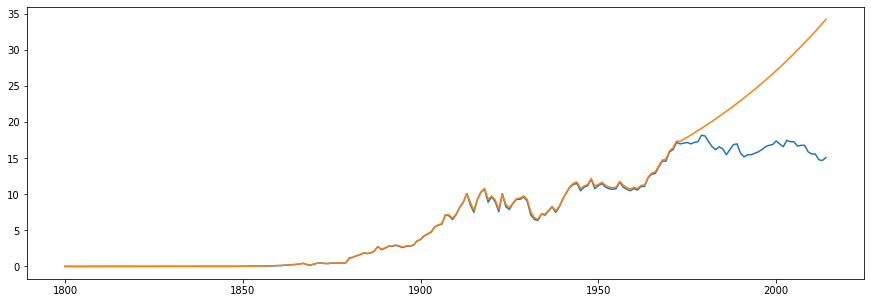

In [34]:
#Exponential Smoothing with multiplicative trend
exp_mul = ExponentialSmoothing(train,trend = 'mul').fit()
prediction = exp_mul.predict(1,215)
rmse4 =np.sqrt(mean_squared_error(data['CO2'],prediction))
print(rmse4)
prediction_series = pd.Series(prediction,index = data.index)
print(prediction_series)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(data['CO2'])
plt.plot(prediction_series)

In [35]:
rmse_df = pd.DataFrame({'Model':['ARIMA','Holt method','ExponentialSmoothing_add','ExponentialSmoothing_mul'],'RMSE':[0.543,rmse2,rmse3,rmse4]})

In [36]:
rmse_df

,Model,RMSE
0,ARIMA,0.543000
1,Holt method,2.089166
2,ExponentialSmoothing_add,2.089166
3,ExponentialSmoothing_mul,4.412254


# Lowest RMSE value is for ARIMA(0,2,1) 

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [16]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X,order = (0,2,1))
model_fit = model.fit()

In [18]:
X = data.values
X = X.astype('float32')

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X,order = (0,2,1))
model_fit = model.fit()

In [45]:
forecast = model_fit.forecast(steps = 26)

In [46]:
forecast

array([15.17053367, 15.24106695, 15.31160023, 15.38213352, 15.4526668 ,
       15.52320008, 15.59373337, 15.66426665, 15.73479993, 15.80533322,
       15.8758665 , 15.94639978, 16.01693307, 16.08746635, 16.15799963,
       16.22853292, 16.2990662 , 16.36959949, 16.44013277, 16.51066605,
       16.58119934, 16.65173262, 16.7222659 , 16.79279919, 16.86333247,
       16.93386575])

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  215
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -177.122
Date:                Sat, 19 Feb 2022   AIC                            358.243
Time:                        15:28:33   BIC                            364.966
Sample:                             0   HQIC                           360.960
                                - 215                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.534     -1.872      0.061      -2.047       0.047
sigma2         0.3012      0.163      1.848      0.065      -0.018       0.621
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               127.23
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):             236.59   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

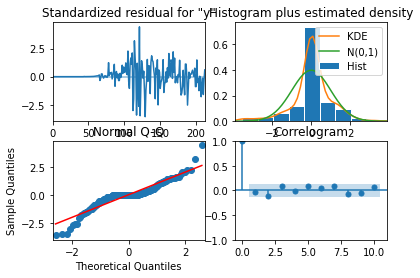

In [40]:
model_fit.plot_diagnostics()
plt.show()

# Predicted Plot

In [48]:
future_year = [len(data)+i-1 for i in range(1,27)]
future_df = pd.DataFrame(index = future_year[:],columns = data.columns )

In [49]:
future_df['CO2'] = forecast 
Y = future_df.astype(float)

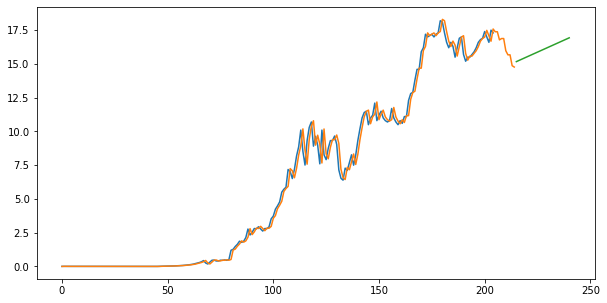

In [50]:
plt.figure(figsize=(10,5))
plt.plot(X,label = 'Original')
plt.plot(model_fit.predict(),label = 'Predicted')
plt.plot(Y,label = 'Predicted')
plt.show()